# spambase

In [1]:
import pickle
with open('spam.pickle', 'rb') as f:
    spam = pickle.load(f)

In [2]:
spam['train_data'].shape

(3601, 57)

In [3]:
spam['train_labels'].shape

(3601,)

In [4]:
spam['test_data'].shape

(1000, 57)

In [5]:
spam['test_labels'].shape

(1000,)

In [6]:
spam['feature_names']

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [7]:
spam['class_names']

['not spam', 'spam']

### import necessary packages

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## problem 3.4

In [9]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X=spam['train_data'], y=spam['train_labels'])
print(round(1-DTC.score(X=spam['train_data'], y=spam['train_labels']),5))
print(DTC.score(X=spam['test_data'], y=spam['test_labels']))

0.00028
0.904


In [10]:
from sklearn.metrics import classification_report
print('Performance on training data')
print(classification_report(spam['train_labels'],
    DTC.predict(spam['train_data']),
    target_names=spam['class_names']))

print('Performance on test data')

print(classification_report(spam['test_labels'],
    DTC.predict(spam['test_data']),
    target_names=spam['class_names']))

Performance on training data
              precision    recall  f1-score   support

    not spam       1.00      1.00      1.00      2186
        spam       1.00      1.00      1.00      1415

    accuracy                           1.00      3601
   macro avg       1.00      1.00      1.00      3601
weighted avg       1.00      1.00      1.00      3601

Performance on test data
              precision    recall  f1-score   support

    not spam       0.94      0.90      0.92       602
        spam       0.85      0.91      0.88       398

    accuracy                           0.90      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.90      0.90      1000



In [11]:
dtc = DecisionTreeClassifier(random_state=42)
BC = BaggingClassifier(base_estimator=dtc,
                       n_estimators=10,
                       random_state=42)
BC.fit(X=spam['train_data'], y=spam['train_labels'])
print(round(1-BC.score(X=spam['train_data'], y=spam['train_labels']),5))
print(round(1-BC.score(X=spam['test_data'], y=spam['test_labels']),5))

0.00417
0.065


In [12]:
from sklearn.metrics import classification_report
print('Performance on training data')
print(classification_report(spam['train_labels'],
    BC.predict(spam['train_data']),
    target_names=spam['class_names']))

print('Performance on test data')

print(classification_report(spam['test_labels'],
    BC.predict(spam['test_data']),
    target_names=spam['class_names']))

Performance on training data
              precision    recall  f1-score   support

    not spam       0.99      1.00      1.00      2186
        spam       1.00      0.99      0.99      1415

    accuracy                           1.00      3601
   macro avg       1.00      0.99      1.00      3601
weighted avg       1.00      1.00      1.00      3601

Performance on test data
              precision    recall  f1-score   support

    not spam       0.96      0.93      0.95       602
        spam       0.90      0.94      0.92       398

    accuracy                           0.94      1000
   macro avg       0.93      0.94      0.93      1000
weighted avg       0.94      0.94      0.94      1000



## problem 3.5

In [13]:
params = [2, 4, 8, 16, 32, 64, 128, 256]
test_error_rate = []
for param in params:
    BC = BaggingClassifier(n_estimators=param, random_state=42)
    BC.fit(X=spam['train_data'], y=spam['train_labels'])
    test_error_rate.append(1-BC.score(X=spam['test_data'], y=spam['test_labels']))

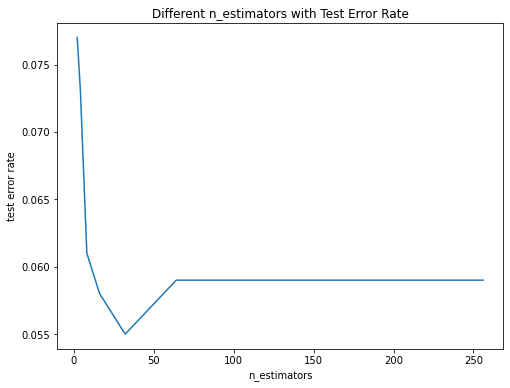

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(params, test_error_rate);
ax.set_xlabel('n_estimators')
ax.set_ylabel('test error rate')
ax.set_title('Different n_estimators with Test Error Rate');